In [1]:
# today we will build a model that predict co2 emission using the vehicle emmission canada dataset from kaggle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df = pd.read_csv(r"C:\Users\parin\Downloads\CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [16]:
df.info()
# lets check the null values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

#there are no null values

In [17]:
#now lets check the number of unique values in each column
for col in df.columns:  
    print(f"{col}: {df[col].nunique()} unique values")

Make: 42 unique values
Model: 2053 unique values
Vehicle Class: 16 unique values
Engine Size(L): 51 unique values
Cylinders: 8 unique values
Transmission: 27 unique values
Fuel Type: 5 unique values
Fuel Consumption City (L/100 km): 211 unique values
Fuel Consumption Hwy (L/100 km): 143 unique values
Fuel Consumption Comb (L/100 km): 181 unique values
Fuel Consumption Comb (mpg): 54 unique values
CO2 Emissions(g/km): 331 unique values


In [18]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


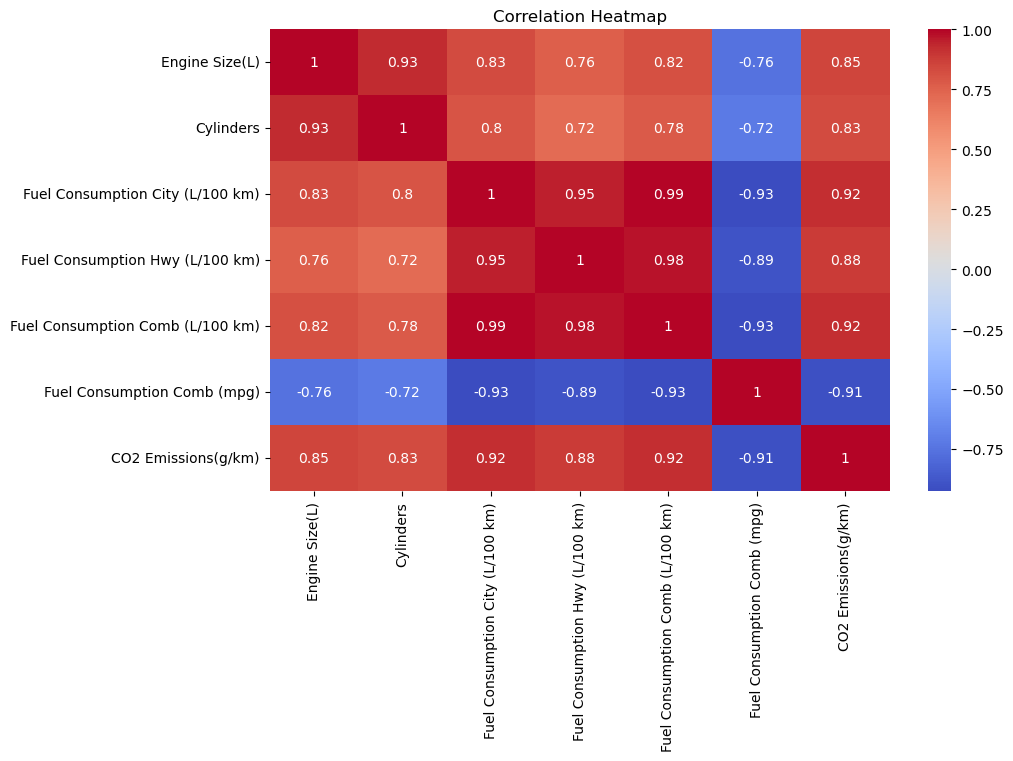

In [19]:
# now lets visualise and see how engine size affects the co2 emission
plt.figure(figsize=(10, 6)) 
sns.heatmap(df.corr(numeric_only= True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

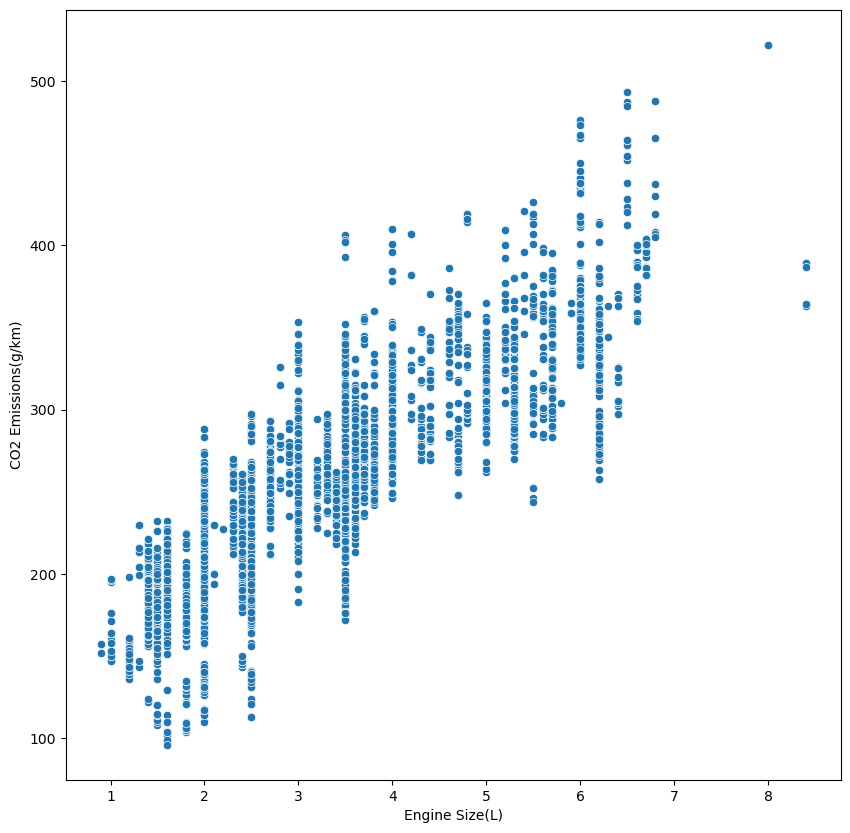

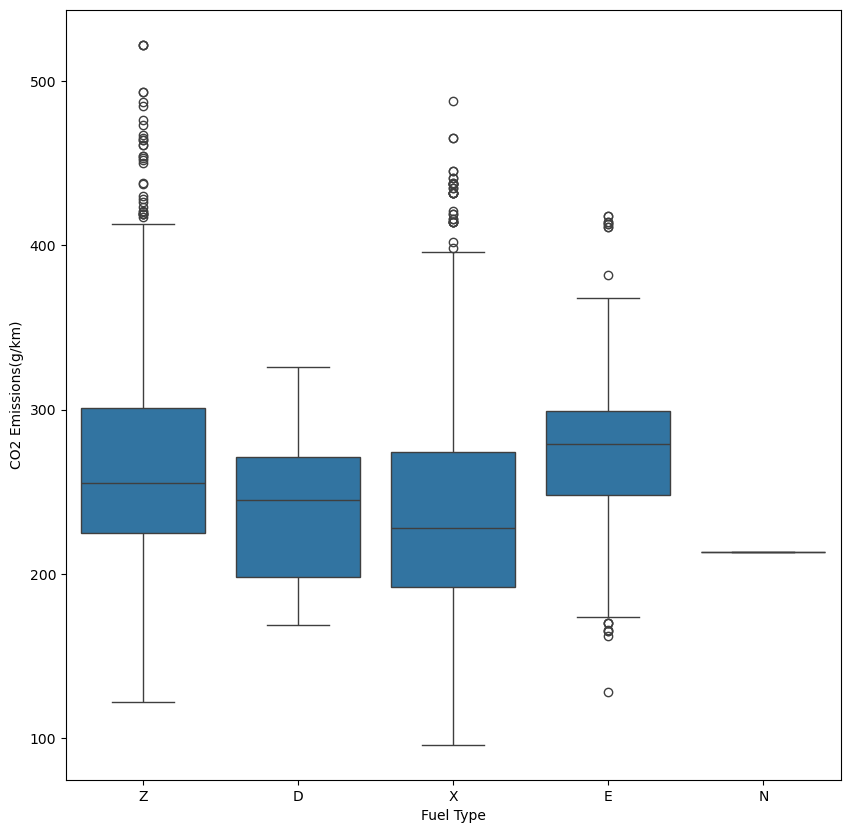

<Figure size 1000x1000 with 0 Axes>

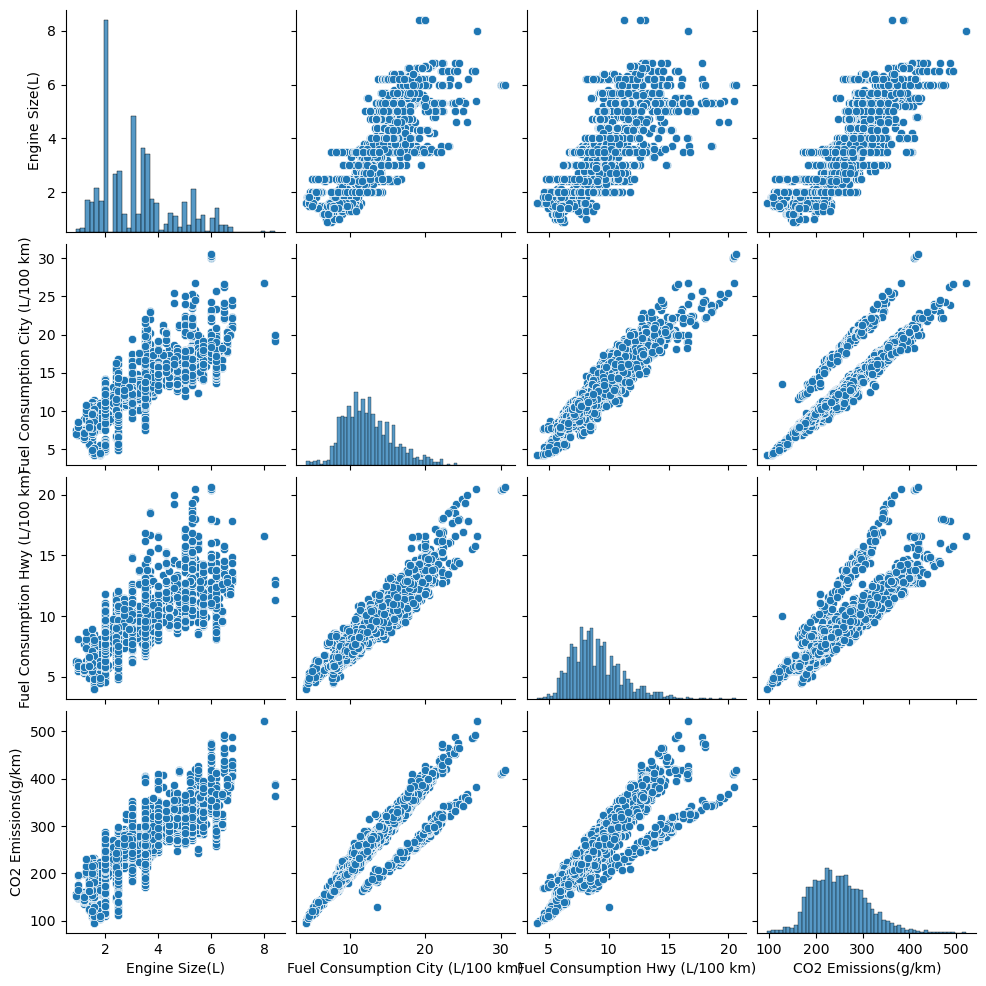

In [21]:
# Scatterplot: Engine Size vs CO2
plt.figure(figsize=(10,10))
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=df)
plt.show()

# Boxplot: Fuel Type vs CO2
plt.figure(figsize=(10,10))
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df)
plt.show()

# Pairplot for a few key features
plt.figure(figsize=(10,10))
sns.pairplot(df[['Engine Size(L)', 'Fuel Consumption City (L/100 km)',
                 'Fuel Consumption Hwy (L/100 km)', 'CO2 Emissions(g/km)']])
plt.show()

In [22]:
#okay now lets move to data preprocessing

In [23]:
# Drop unnecessary columns
df = df.drop(['Make', 'Model'], axis=1)  # Optional: if you think these won't help

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)  # Avoid dummy variable trap

# Define features (X) and target (y)
X = df_encoded.drop('CO2 Emissions(g/km)', axis=1)
y = df_encoded['CO2 Emissions(g/km)']


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: 0.9904674887950905
RMSE: 5.726105733371947


c:\Users\parin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
#this much high r2 score is not good because we have not done any feature engineering or hyperparameter tuning
#we can improve the model by doing feature engineering and hyperparameter tuning or by adding regularization techniques like Lasso or Ridge regression

In [26]:
from sklearn.linear_model import Ridge

# Try different alpha (λ) values for regularization strength
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

# Evaluation
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)

print("Ridge R² Score:", r2_ridge)
print("Ridge RMSE:", rmse_ridge)


Ridge R² Score: 0.9906064932624364
Ridge RMSE: 5.684202960233694


c:\Users\parin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)  # Start small; Lasso is aggressive
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

# Evaluation
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)

print("Lasso R² Score:", r2_lasso)
print("Lasso RMSE:", rmse_lasso)


Lasso R² Score: 0.9891425482272228
Lasso RMSE: 6.111103727610942


c:\Users\parin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Zero coefficients: 40


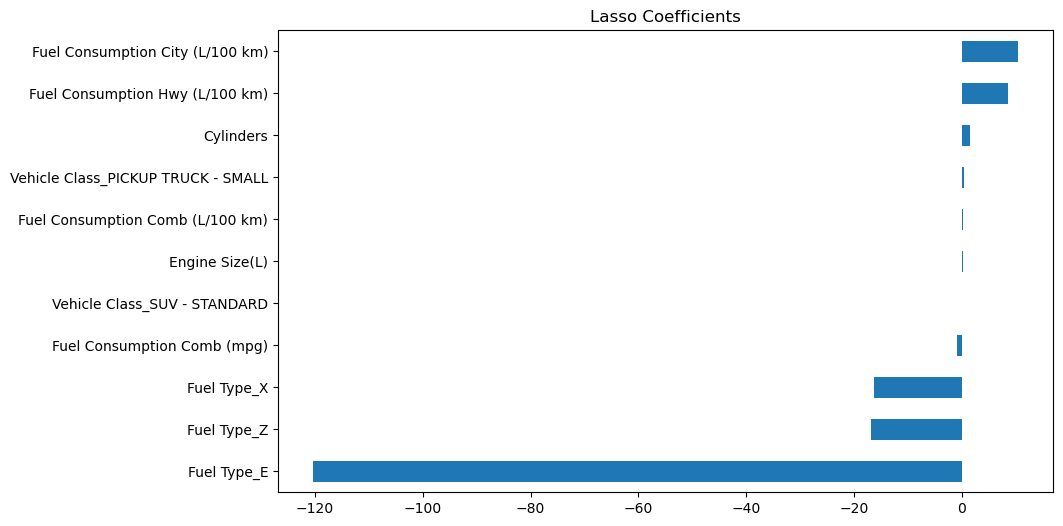

In [28]:
lasso_coeffs = pd.Series(lasso.coef_, index=X.columns)
print("Zero coefficients:", (lasso_coeffs == 0).sum())
lasso_coeffs[lasso_coeffs != 0].sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Lasso Coefficients')
plt.show()